### Importing Libraries


The first thing we do is to import our libraries and dependencies to help us interact with the python kernel. In the code cell below, we import **pandas** for dataframe manipulation, **matplotlib** and **seaborn** for visualisation, **MinMaxSclaer** for feature scaling our data. 

We also import our **Naive Bayes** and **Logistic regression** models from the sklearn python module for machine learning. We use the **train_test_split** to divide the data into the **training and testing** subdatasets for **module training** and **evaluation**. 

lastly we use our **metrics**, **confusion matrix**, **Accuracy_score** and **classification_report** to evaluate our model performance.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Exploratory Data Analysis

Exploratory data analysis is a vital part of any data science project, this step is so pivotal because it is during this stage that we clean up our data and make sure it is fit for purpose before modelling. In the follwing code cells (cells 2-7), we load the data into python(2), then display the first five rows (3). In cell 4, we inspect the **dimension**, **data types**, **number of unique variables in each column** and **print the number of null values in each variable**. 


In cell 5, we add the total number of null values in our entire data set and find out we have **0** nulls. Cell 6 is where we check for duplicate rows in the dataset and find out there are **234** rows with exactly same values for each column, these duplicates are redundant and need to be dropped to reduce compuatation time during training. 

In [2]:
#importing data
data=pd.read_csv("C:\\Users\\Okwuazu\\Downloads\\cancerdata.csv")

In [3]:
#displaying data 
data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0


In [4]:
print(data.shape)                 #display dimension of the data set 
print('...........................................................')
print(data.info())                # display column type 
print('...........................................................')
print(data.describe())            #Quick statistical summary of the dataframe 
print('...........................................................')
print(data.isnull().count())      #check for null values
print('...........................................................')
print(data.nunique())              #check for the number of unique elements in each column  

(683, 10)
...........................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB
None
...........................................................
       Cl.thickness   Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
count    683.000000  683.000000  683.000000     683.000000    683.000000   
mean 

In [5]:
# To know the number of missing values 
data.isna().sum().sum()

0

In [6]:
#Display the number of duplicate rows in the data 
data.duplicated().sum()

234

In [7]:
#drop duplicate values 
data.drop_duplicates(subset=None, keep='first', inplace=True)
data

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0
...,...,...,...,...,...,...,...,...,...,...
677,2.824082,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,4.526695,0
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268,0
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695,1
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268,1


### Data splitting 

It is always good practise to separate our dataset into dependent(y) and independent variables (X). This would help us perform feature scaling on the inputs only, while maintaining the integrity of the target variable. 

The inputs(indepenent variables) are stored in a variable X and contain the following columns:

**• Cl.thickness - Clump Thickness**

**• Cell.size - Uniformity of Cell Size**

**• Cell.shape - Uniformity of Cell Shape**

**• Marg.adhesion - Marginal Adhesion**

**• Epith.c.size - Single Epithelial Cell Size**

**• Bare.nuclei - Bare Nuclei**

**• Bl.cromatin - Bland Chromatin**

**• Normal.nucleoli - Normal Nucleoli**

**• Mitoses - Mitoses**





The output (target/dependent) variable is the variable we are trying to predict, it is the class column in our dataset.


 **• Class - Class**

In [8]:
#Extracting independent variables
X=data.loc[:, data.columns != 'Class']

In [9]:
X

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268
...,...,...,...,...,...,...,...,...,...
677,2.824082,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,4.526695
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268


In [10]:
y=data[["Class"]]

In [11]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
677,0
678,0
680,1
681,1


### Feature Scaling

Feauture scaling is a normalisation technique that is used to ensure that all the values in the dataset lie within similar range. This is done to prevent bias during training as where we have a large range i.e very high values in some variables and very small ones in other variables, our model tends to assume that the larger values are more significant than the smaller ones, this can cause unwanted preference. There are different scaling techniques, but the one we employ here is MinMax Scaling which ensures that the values in our inputs lie between 0 and 1. This is done by making the minimum value in each variable 0 and the maximum value 1, then all other values are made to lie between 0 and 1. 

In cell 16, we specify a test size of 20%, meaning 20% of our data is reserved for testing and not used during training, meaning 80% is used for the training phase

In [13]:
scaler_x=MinMaxScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)

In [14]:
X_scaled

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

### Model Training- Logistic Regression 

Logistics Regression which a predictive analysis that model the probability of an event occurring based on a given dataset. It is also a statistical method for predicting binary classes. The logistic regression is used here to model cancer detection problems


The inputs to the model are those outlined in the data splitting stage, while the output is the class variable as defined in the splitting stage above. 

In cell 18, we train the model and make predictions using the test data in cell 19. 

In [18]:
regressor=LogisticRegression()
regressor.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [19]:
y_pred=regressor.predict(X_test)

### Model Evaluation for Logistic Regression 

In this stage of the project, we evaluate the model performance using accuracy score, confusion_matrix and classification report. 

In [20]:
#Evaluation matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  2]
 [ 4 51]]
0.9333333333333333
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.96      0.93      0.94        55

    accuracy                           0.93        90
   macro avg       0.93      0.94      0.93        90
weighted avg       0.93      0.93      0.93        90



C:\Users\ebuno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


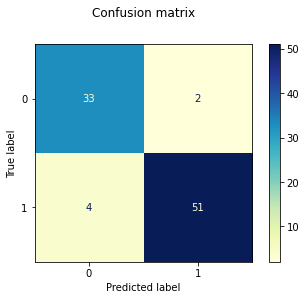

In [22]:
plot_confusion_matrix(regressor, X_test, y_test, values_format = '',cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1);

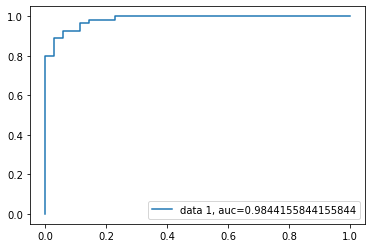

In [24]:
y_pred_proba = regressor.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Model Training - Naive Bayes

The Naïve Bayes which an application of Bayes rules used in performing the classification of the data point. It is also used here to model cancer detection problems 
 
For the model, the inputs is the Cl.thickness, Cell. size, Cell.shape, Marg.adhesion, Epith.c.size, Bare.nuclei, Bl.cromatin, Normal.nucleoli, Mitoses. They are called the independent variables While the target which is the Class is the outputs and is called the dependent variable.

In cell 26, we train a Naive Bayes model and make predictions using the test data in cell 27. 
   

In [26]:
naivebayes=GaussianNB()
naivebayes.fit(X_train,y_train.values.ravel())

GaussianNB()

In [27]:
y_pred=naivebayes.predict(X_test)

### Model Evaluation - Naive Bayes 

In this stage of the project, we evaluate the model performance of our Naive Bayes model using accuracy score, confusion_matrix and classification report. 

In [28]:
#Evaluation matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[30  5]
 [ 3 52]]
0.9111111111111111
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.91      0.95      0.93        55

    accuracy                           0.91        90
   macro avg       0.91      0.90      0.91        90
weighted avg       0.91      0.91      0.91        90



C:\Users\ebuno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


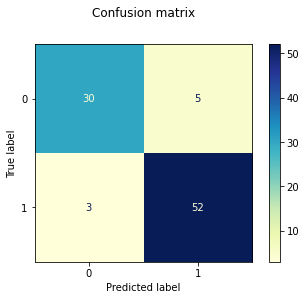

In [29]:
plot_confusion_matrix(naivebayes, X_test, y_test, values_format = '',cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1);

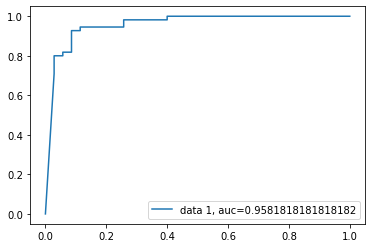

In [30]:
y_pred_proba = naivebayes.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Comparing model performance. 

In Comparing the two models, we evaluated the matrix and the predicted values using

### 1. Confusion Matrix

The confusion matrix contains vital informaation about our model performance. It gives us four important metrics as defined below:

**The True Positive (TP)**: is the predicted value which matches the actual value, the actual value was positive and predicted a positive value. 

**The False Positive (FP)**: is the predicted false value in which the actual value was negative but predicted a positive value. It is also known as a type 1 error. 

**The False Negative (FN)**:  is the predicted false value in which the actual value was positive but predicted a negative value. It is also known as the type 2 error and 

**The True Negative (TN)**:  is the predicted value that matches the actual value but the actual value was negative and predicted a negative value.

This confusion matrix visualization shows us how the algorithm performed. 

**For Logistic regression, the 33 is the True Postives, 2 is the False Positive, 4 is the False Negative and 51 is the Tue Negetive.**

**For the Naive Bayes,30 is the True Postives, 5 is the False Positive,3 is the False Negetive and the 52 is the Tue Negetive.**




## ii.Accuracy score 

The accuracy score which is the metric given as a fraction of the correct predictions generated by the model.For Logistic regression we have **0.93** and for the Naive Bayes we have **0.91**. 

**iii Classification report**
This contains import metrics such as 

**Precision**: This is measure of the correctly classified postive values divided by the total number of positive observations. The precision for the logistic regression for measuring the precision for predicting 0 sublass is **0.89** and for the 1 sub class is **0.96**. The Naive bayes has a precision of **0.91** for prediciting both the 0 and 1 sublcass. 

**Recall**: This is the measure of the true positives, over the total actual positives in the entire dataset. The recall is also called sensitivity. The sensitivity of the model for the 0 and 1 sublass for Logistic regression is **0.94** and **0.93**, while for the Naive bayes is **0.86** and **0.95**. 

**F1 score**: This is the harmonic mean of precision and recall. The F1 score for the 0 and 1 subclass for logistic regression is **0.92** and **0.94**, while for the Naive bayes is **0.88** and **0.93** repesctively. 



## iii. Receiver Operating Curve (ROC) using the Area Under Curve (AUC) Scores:

The ROC curve here is used  to measure the performance of the classifier model based on the rate or correct and incorrect classification.  The Area under the curve(AUC) is used to visualize the performance of the multi-class. From the graph, the AUC score curve for both Logistic regression and Naive Bayes is closer to the top left corner this is because it is closer to 1. The auc score for the logisitic regression is **0.98** while that of the Naive bayes is **0.96**.
 


## Conclusion and discusion 

Based on the metrics above, we can deduce that the Logistic regression performs better in classifying the cancer prediction as either malignant or benign. Unfortunately the data has been encoded and we are not able to determine what subclass 0 and 1 represent in terms of the severity/type of the cancer. I would suggest that the logistic be used instead of the Naive bayes as it has higher accuracy, overall precision, recall, f1 score across both subclassess. 


## Recommendation 

I would recommend that we employ certain techniques to improve the performance of both models. Since we are using them for a very sensitive use case, it would be tragic if a person is diagnosed as benign when they are malignant, and although not as bad, the anxiety and trauma caused by wrong diagnosis of a patient as malignant when they are actually benign cannot be overemphasised. 

We can perform hyperparameter tunning, better feature selection and a more extensive exploratory data analysis to seek improvement in our model performance. We can also use other models e.g Random forest to see if we can obtain better performance.